<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [0]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.3.0-tf


## Step 1: Data Loading

### Local Machine JupyterNotebook

In [0]:
import tensorflow.keras
import os, shutil

 #Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 

# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Assign the 10 types of food from your .txt file to a list variable 'food_list'
   
label_file = os.path.join(base_dir, '13.txt') 
# Refer to the report Appendix
# Please enter the name of .txt file which contains a list of food assigned to you
# Make sure you save the .txt file in your base_dir

with open(label_file, 'r') as f:
    x = f.readlines()
    
food_list =[]
for item in x:
    if item == '\n':
        continue        
    else:
        food_list.append(item.strip('\n'))
        
#copy the first 750 images to train folder
for item in food_list:
    train_food_dir = os.path.join(train_dir, item)
    os.mkdir(train_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[:750]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(train_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the following 200 images [750:950] to validation folder
for item in food_list:
    validation_food_dir = os.path.join(validation_dir, item)
    os.mkdir(validation_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[750:950]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(validation_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the remaining 50 images [950:1000] to test folder
for item in food_list:
    test_food_dir = os.path.join(test_dir, item)
    os.mkdir(test_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[950:1000]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(test_food_dir, fname)
        shutil.copyfile(src, dst)

In [0]:
#run if directories already created

import tensorflow.keras
import os, shutil

#Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 
# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

### Google Colab + GitHub

In [1]:
#run for GitHub Colab
!git clone "https://github.com/BenjLiew/DL_Assg1.git"


Cloning into 'DL_Assg1'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 10140 (delta 57), reused 24 (delta 9), pack-reused 10039
Receiving objects: 100% (10140/10140), 486.49 MiB | 46.91 MiB/s, done.
Resolving deltas: 100% (58/58), done.
Checking out files: 100% (10027/10027), done.


In [0]:
#GitHub Colab directory
# Directories for your training, validation and test splits
train_dir = '/content/DL_Assg1/train'
validation_dir = '/content/DL_Assg1/validation'
test_dir = '/content/DL_Assg1/test'

In [3]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Data Augmentation preview

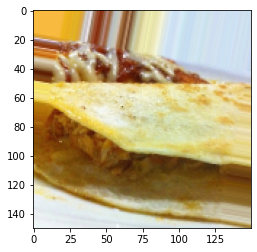

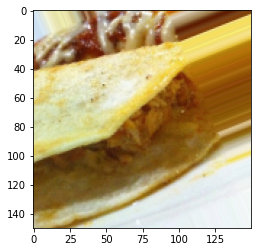

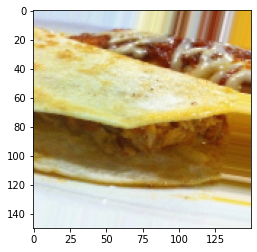

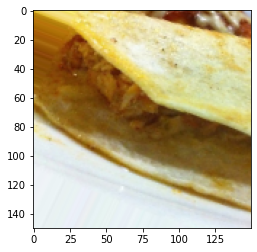

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


train_cq_dir = '/content/drive/My Drive/Colab Notebooks/test/chicken_quesadilla'
fnames = [os.path.join(train_cq_dir, fname) for fname in os.listdir(train_cq_dir)]

# We pick one image to "augment"
img_path = fnames[17]

# Read the image and resize it
img_size=150
img = image.load_img(img_path, target_size=(img_size, img_size))

# Convert it to a Numpy array with shape (50, 50, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        

plt.show()

## Step 2:  Develop the Image Classification Models

### Model #1 (BaseModel / Own-Model)

In [0]:
# Build the Model from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model10 = models.Sequential()
model10.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model10.add(layers.Conv2D(32, (3, 3), activation='relu'))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dense(64, activation='relu'))
model10.add(layers.Dense(10, activation='softmax'))



model10.summary()



model10.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 144, 144, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 70, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)            

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history10 = model10.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/120
750/750 [==============================] - 100s 134ms/step - loss: 2.1599 - acc: 0.2095 - val_loss: 1.8549 - val_acc: 0.3595
Epoch 2/120
750/750 [==============================] - 100s 133ms/step - loss: 1.8732 - acc: 0.3455 - val_loss: 1.6131 - val_acc: 0.4460
Epoch 3/120
750/750 [==============================] - 99s 132ms/step - loss: 1.6986 - acc: 0.4013 - val_loss: 1.5918 - val_acc: 0.4365
Epoch 4/120
750/750 [==============================] - 99s 132ms/step - loss: 1.6050 - acc: 0.4395 - val_loss: 1.4676 - val_acc: 0.4865
Epoch 5/120
750/750 [==============================] - 98s 131ms/step - loss: 1.5349 - acc: 0.4631 - val_loss: 1.4059 - val_acc: 0.5100
Epoch 6/120
750/750 [==============================] - 98s 130ms/step - loss: 1.4969 - acc:

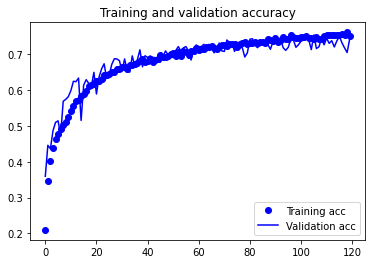

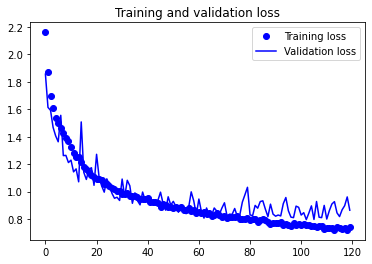

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.765999972820282


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc10 = history10.history['acc']
val_acc10 = history10.history['val_acc']
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']

epochs10 = range(len(acc10))

plt.plot(epochs10, acc10, 'bo', label='Training acc')
plt.plot(epochs10, val_acc10, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model10.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model10.save(model_path+'model1(Base).h5')
model10.save('model1(Base)_backup.h5')

### Model #2 (Pre-train - ResNet50)

In [0]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfrozen
conv_base.trainable = True

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

94773248/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
750/750 [==============================] - 104s 138ms/step - loss: 2.9631 - acc: 0.1093 - val_loss: 2.5039 - val_acc: 0.1290
Epoch 2/200
750/750 [==============================] - 103s 137ms/step - loss: 2.5986 - acc: 0.1565 - val_loss: 2.1923 - val_acc: 0.2565
Epoch 3/200
750/750 [==============================] - 103s 137ms/step - loss: 2.4550 - acc: 0.1895 - val_loss: 2.0548 - val_acc: 0.3230
Epoch 4/200
750/750 [==============================] - 103s 137ms/step - loss: 2.3269 - acc: 0.2192 - val_loss: 1.9432 - val_acc: 0.3690
Epoch 5/200
750/750 [==============================] - 103s 137ms/step - loss: 2.2312 - acc: 0.2524 - val_loss: 1.8457 - val_acc: 0.4145
Epoch 6/200
750/750 [==============================] - 103s 137ms/step - loss: 2.1317 - acc: 0.2919 - val_loss: 1.7594 - val_acc: 0.4480
Epoch 7/200
750/

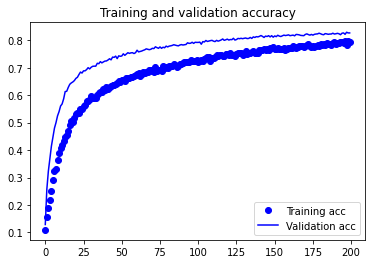

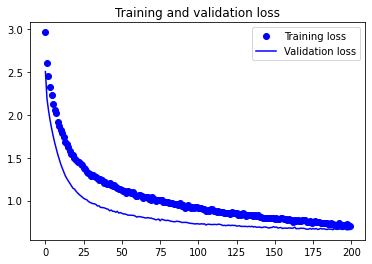

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8479999899864197


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model.save(model_path+'model2(ResNet50).h5')
model.save('model2(ResNet50)_backup.h5')

In [0]:
#More Epochs (200+50)
#re-load model
model = models.load_model(model_path+'model2(ResNet50).h5')
model.summary()


# Train the Model
#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])


history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_7 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

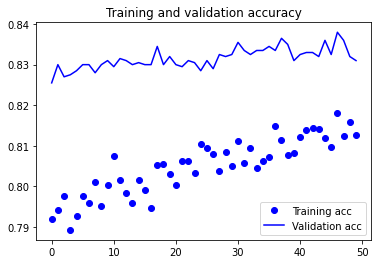

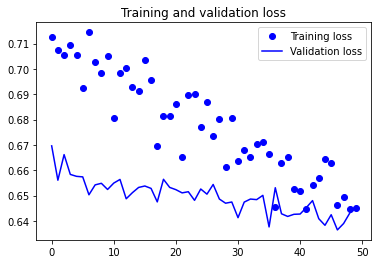

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8579999804496765


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model.save(model_path+'model2(ResNet50)+50e.h5')
model.save('model2(ResNet50)+50e_backup.h5')

### Model #3 (Pre-train - VGG19)

In [0]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base2 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #VGG19 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=75,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
750/750 [==============================] - 122s 163ms/step - loss: 3.5124 - acc: 0.2549 - val_loss: 2.8035 - val_acc: 0.5140
Epoch 2/75
750/750 [==============================] - 125s 166ms/step - loss: 2.6940 - acc: 0.5196 - val_loss: 2.1584 - val_acc: 0.6915
Epoch 3/75
750/750 [==============================] - 125s 167ms/step - loss: 2.2757 - acc: 0.6520 - val_loss: 1.8822 - val_acc: 0.7615
Epoch 4/75
750/750 [==============================] - 126s 168ms/step - loss: 2.0293 - acc: 0.7188 - val_loss: 1.6853 - val_acc: 0.8055
Epoch 5/75
750/750 [==============================] - 125s 167ms/step - loss: 1.8847 - acc: 0.7505 - val_loss: 1.7852 - val_acc: 0.7705
Epoch 6/75
750/750 [==============================] - 125s 167ms/step - loss: 1.7442 - acc: 0.7804 - val_loss: 1.5925 - val_acc: 0.8035
Epoch 7/75
750/750 [==

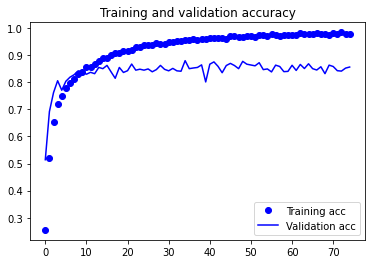

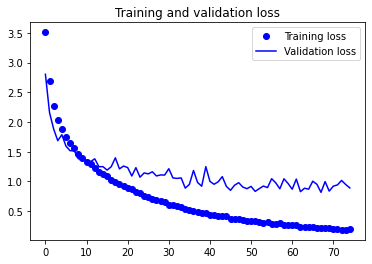

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8659999966621399


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'model3(VGG19).h5')
model2.save('model3(VGG19)_backup.h5')

### Model #4 (Pre-train - MobileNet)

In [0]:
# Build the Model
from tensorflow.keras.applications import MobileNet
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#MobileNet convbase
conv_base2 = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #MobileNet pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32) 

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 87s 116ms/step - loss: 2.6220 - acc: 0.3268 - val_loss: 1.2736 - val_acc: 0.6905
Epoch 2/30
750/750 [==============================] - 86s 115ms/step - loss: 1.7136 - acc: 0.5588 - val_loss: 1.0261 - val_acc: 0.7520
Epoch 3/30
750/750 [==============================] - 86s 114ms/step - loss: 1.4258 - acc: 0.6381 - val_loss: 0.9009 - val_acc: 0.7885
Epoch 4/30
750/750 [==============================] - 86s 115ms/step - loss: 1.2348 - acc: 0.6839 - val_loss: 0.8819 - val_acc: 0.7980
Epoch 5/30
750/750 [==============================] - 85s 114ms/step - loss: 1.1306 - acc: 0.7101 - val_loss: 0.7178 - val_acc: 0.8165
Epoch 6/30
750/750 [==============================] - 86s 114ms/step - loss: 1.0366 - acc: 0.7283 - val_loss: 0.6909 - val_acc: 0.8335
Epoch 7/30
750/750 [========

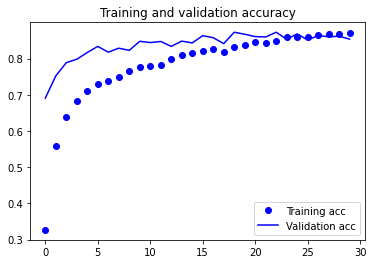

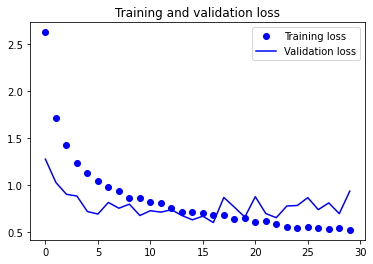

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8460000157356262


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'model4(MobileNet).h5')
model2.save('model4(MobileNet)_backup.h5')

In [0]:
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/30
750/750 [==============================] - 82s 109ms/step - loss: 0.5172 - acc: 0.8759 - val_loss: 0.7158 - val_acc: 0.8600
Epoch 2/30
750/750 [==============================] - 82s 109ms/step - loss: 0.5196 - acc: 0.8720 - val_loss: 0.7134 - val_acc: 0.8605
Epoch 3/30
750/750 [==============================] - 84s 111ms/step - loss: 0.5062 - acc: 0.8755 - val_loss: 0.8370 - val_acc: 0.8615
Epoch 4/30
750/750 [==============================] - 84s 112ms/step - loss: 0.5141 - acc: 0.8757 - val_loss: 1.0898 - val_acc: 0.8490
Epoch 5/30
750/750 [==============================] - 83s 111ms/step - loss: 0.4903 - acc: 0.8833 - val_loss: 0.8126 - val_acc: 0.8690
Epoch 6/30
750/750 [==============================] - 86s 115ms/step - loss: 0.4762 - acc: 0.8851 - val_loss: 0.7717 - val_acc: 0.8640
Epoch 7/30
750/750 [==============================] - 82s 109ms/step - loss: 0.4679 - acc: 0.8852 - val_loss: 0.8161 - val_acc: 0.8660
Epoch 8/30
750/750 [==============================] - 8

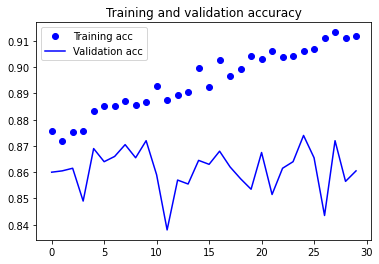

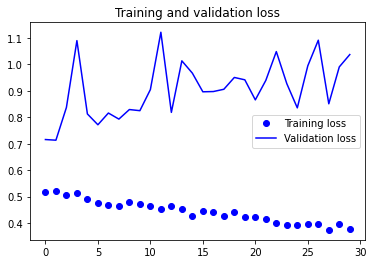

Found 500 images belonging to 10 classes.
test acc: 0.8579999804496765


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'model4(MobileNet)+30e.h5')
model2.save('model4(MobileNet)+30e_backup.h5')

In [0]:
#more epoch (total 100)
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3755 - acc: 0.9159 - val_loss: 0.9065 - val_acc: 0.8635
Epoch 2/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3571 - acc: 0.9152 - val_loss: 0.8136 - val_acc: 0.8745
Epoch 3/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3789 - acc: 0.9127 - val_loss: 1.0888 - val_acc: 0.8675
Epoch 4/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3795 - acc: 0.9131 - val_loss: 1.1148 - val_acc: 0.8610
Epoch 5/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3721 - acc: 0.9141 - val_loss: 1.2027 - val_acc: 0.8590
Epoch 6/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3739 - acc: 0.9129 - val_loss: 1.0861 - val_acc: 0.8565
Epoch 7/40
750/750 [==============================] - 82s 110ms/step - loss: 0.3645 - acc: 0.9155 - val_loss: 0.9163 - val_acc: 0.8735
Epoch 8/40
750/750 [==============================] - 8

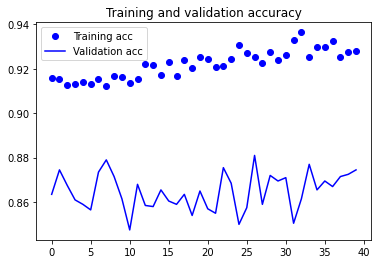

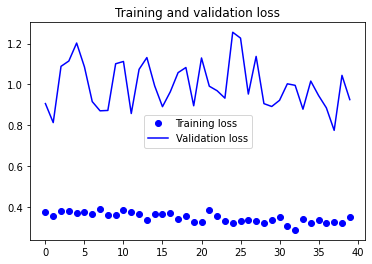

Found 500 images belonging to 10 classes.
test acc: 0.8759999871253967


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'model4(MobileNet)+30e+40e.h5')
model2.save('model4(MobileNet)+30e+40e_backup.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [0]:
#Google colab dir
final_models=model_path+'final_models/'

In [0]:
#Test datagen
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size=150
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

Found 500 images belonging to 10 classes.


In [0]:
# Model #1
from tensorflow.keras import models
model = models.load_model(final_models+'model1(Base).h5')
model.summary()


test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)
print('test loss:', test_loss)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 144, 144, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 70, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)            

In [0]:
# Model #2
model2 = models.load_model(final_models+'model2(ResNet50)+50e.h5')
model2.summary()


test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)
print('test loss:', test_loss)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_7 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [0]:
# Model #3
model3 = models.load_model(final_models+'model3(VGG19).h5')
model3.summary()


test_loss, test_acc = model3.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)
print('test loss:', test_loss)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5

In [0]:
# Model #4
model4 = models.load_model(final_models+'model4(MobileNet)+30e+40e.h5')
model4.summary()


test_loss, test_acc = model4.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)
print('test loss:', test_loss)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [0]:
# Save the best model

model4.save(final_models+'food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [0]:
# Load the model
from tensorflow.keras import models

model_best = models.load_model(final_models+'food_model_best.h5')
model_best.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [0]:
# Load the food list (in alphabetical order)
#dir for 13.txt
list_text='/content/drive/My Drive/Colab Notebooks/13.txt'

with open(list_text, 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

food_list=food_list[10:]
print(food_list)


['', '', '', '', '', '', '', '', '', '', 'apple_pie', 'beef_carpaccio', 'cheesecake', 'chicken_quesadilla', 'clam_chowder', 'oysters', 'pad_thai', 'paella', 'red_velvet_cake', 'tuna_tartare']
['apple_pie', 'beef_carpaccio', 'cheesecake', 'chicken_quesadilla', 'clam_chowder', 'oysters', 'pad_thai', 'paella', 'red_velvet_cake', 'tuna_tartare']


In [0]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

Using TensorFlow backend.


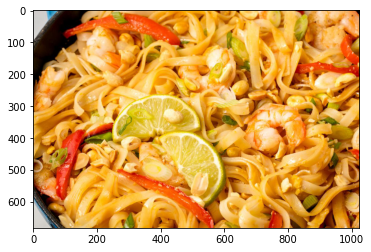

The prediction is:  pad_thai 

       apple_pie  beef_carpaccio  ...  red_velvet_cake  tuna_tartare
0  9.700959e-22    5.448568e-18  ...     4.844953e-31  3.015259e-18

[1 rows x 10 columns]

ALL Predictions:
apple_pie
0    9.700959e-22
Name: apple_pie, dtype: float32


beef_carpaccio
0    5.448568e-18
Name: beef_carpaccio, dtype: float32


cheesecake
0    1.709522e-28
Name: cheesecake, dtype: float32


chicken_quesadilla
0    2.100026e-17
Name: chicken_quesadilla, dtype: float32


clam_chowder
0    2.199341e-31
Name: clam_chowder, dtype: float32


oysters
0    1.240764e-26
Name: oysters, dtype: float32


pad_thai
0    1.0
Name: pad_thai, dtype: float32


paella
0    4.115474e-13
Name: paella, dtype: float32


red_velvet_cake
0    4.844953e-31
Name: red_velvet_cake, dtype: float32


tuna_tartare
0    3.015259e-18
Name: tuna_tartare, dtype: float32




In [0]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
img_size=150

img = '/content/drive/My Drive/Colab Notebooks/pad_thai_img.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model_best, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)


print('\nALL Predictions:')
for i in prob_df:
  print(i)
  print(prob_df[i])
  print('\n')

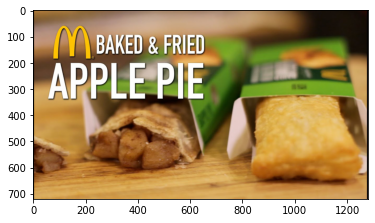

The prediction is:  apple_pie 

    apple_pie  beef_carpaccio  ...  red_velvet_cake  tuna_tartare
0        1.0    2.227693e-14  ...     9.524381e-14  3.463314e-10

[1 rows x 10 columns]

ALL Predictions:
apple_pie
0    1.0
Name: apple_pie, dtype: float32


beef_carpaccio
0    2.227693e-14
Name: beef_carpaccio, dtype: float32


cheesecake
0    5.430508e-09
Name: cheesecake, dtype: float32


chicken_quesadilla
0    6.730517e-08
Name: chicken_quesadilla, dtype: float32


clam_chowder
0    8.314519e-12
Name: clam_chowder, dtype: float32


oysters
0    2.121024e-12
Name: oysters, dtype: float32


pad_thai
0    6.861144e-08
Name: pad_thai, dtype: float32


paella
0    1.168134e-09
Name: paella, dtype: float32


red_velvet_cake
0    9.524381e-14
Name: red_velvet_cake, dtype: float32


tuna_tartare
0    3.463314e-10
Name: tuna_tartare, dtype: float32




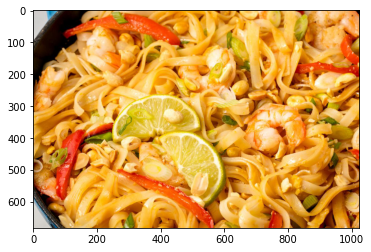

The prediction is:  pad_thai 

       apple_pie  beef_carpaccio  ...  red_velvet_cake  tuna_tartare
0  9.700959e-22    5.448568e-18  ...     4.844953e-31  3.015259e-18

[1 rows x 10 columns]

ALL Predictions:
apple_pie
0    9.700959e-22
Name: apple_pie, dtype: float32


beef_carpaccio
0    5.448568e-18
Name: beef_carpaccio, dtype: float32


cheesecake
0    1.709522e-28
Name: cheesecake, dtype: float32


chicken_quesadilla
0    2.100026e-17
Name: chicken_quesadilla, dtype: float32


clam_chowder
0    2.199341e-31
Name: clam_chowder, dtype: float32


oysters
0    1.240764e-26
Name: oysters, dtype: float32


pad_thai
0    1.0
Name: pad_thai, dtype: float32


paella
0    4.115474e-13
Name: paella, dtype: float32


red_velvet_cake
0    4.844953e-31
Name: red_velvet_cake, dtype: float32


tuna_tartare
0    3.015259e-18
Name: tuna_tartare, dtype: float32




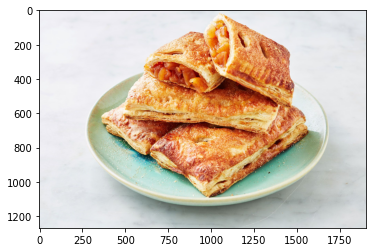

The prediction is:  apple_pie 

    apple_pie  beef_carpaccio  ...  red_velvet_cake  tuna_tartare
0   0.996398    4.607562e-07  ...         0.000001      0.000077

[1 rows x 10 columns]

ALL Predictions:
apple_pie
0    0.996398
Name: apple_pie, dtype: float32


beef_carpaccio
0    4.607562e-07
Name: beef_carpaccio, dtype: float32


cheesecake
0    0.000315
Name: cheesecake, dtype: float32


chicken_quesadilla
0    0.003147
Name: chicken_quesadilla, dtype: float32


clam_chowder
0    0.000015
Name: clam_chowder, dtype: float32


oysters
0    0.000006
Name: oysters, dtype: float32


pad_thai
0    0.000012
Name: pad_thai, dtype: float32


paella
0    0.00003
Name: paella, dtype: float32


red_velvet_cake
0    0.000001
Name: red_velvet_cake, dtype: float32


tuna_tartare
0    0.000077
Name: tuna_tartare, dtype: float32




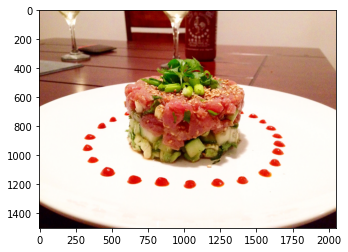

The prediction is:  tuna_tartare 

       apple_pie  beef_carpaccio  ...  red_velvet_cake  tuna_tartare
0  1.696852e-21    4.401047e-14  ...     1.602040e-25           1.0

[1 rows x 10 columns]

ALL Predictions:
apple_pie
0    1.696852e-21
Name: apple_pie, dtype: float32


beef_carpaccio
0    4.401047e-14
Name: beef_carpaccio, dtype: float32


cheesecake
0    1.058551e-20
Name: cheesecake, dtype: float32


chicken_quesadilla
0    1.033391e-20
Name: chicken_quesadilla, dtype: float32


clam_chowder
0    7.730501e-30
Name: clam_chowder, dtype: float32


oysters
0    1.142769e-28
Name: oysters, dtype: float32


pad_thai
0    3.542072e-25
Name: pad_thai, dtype: float32


paella
0    1.308677e-21
Name: paella, dtype: float32


red_velvet_cake
0    1.602040e-25
Name: red_velvet_cake, dtype: float32


tuna_tartare
0    1.0
Name: tuna_tartare, dtype: float32




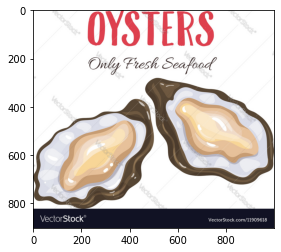

The prediction is:  clam_chowder 

    apple_pie  beef_carpaccio  ...  red_velvet_cake  tuna_tartare
0   0.023126        0.003774  ...         0.006036      0.011353

[1 rows x 10 columns]

ALL Predictions:
apple_pie
0    0.023126
Name: apple_pie, dtype: float32


beef_carpaccio
0    0.003774
Name: beef_carpaccio, dtype: float32


cheesecake
0    0.055579
Name: cheesecake, dtype: float32


chicken_quesadilla
0    0.016136
Name: chicken_quesadilla, dtype: float32


clam_chowder
0    0.850097
Name: clam_chowder, dtype: float32


oysters
0    0.027904
Name: oysters, dtype: float32


pad_thai
0    0.001266
Name: pad_thai, dtype: float32


paella
0    0.004729
Name: paella, dtype: float32


red_velvet_cake
0    0.006036
Name: red_velvet_cake, dtype: float32


tuna_tartare
0    0.011353
Name: tuna_tartare, dtype: float32




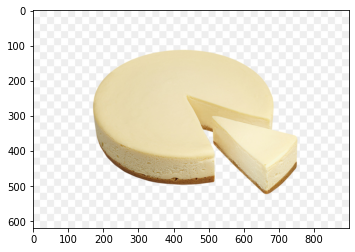

The prediction is:  cheesecake 

    apple_pie  beef_carpaccio  ...  red_velvet_cake  tuna_tartare
0   0.003496        0.000016  ...         0.005726      0.000492

[1 rows x 10 columns]

ALL Predictions:
apple_pie
0    0.003496
Name: apple_pie, dtype: float32


beef_carpaccio
0    0.000016
Name: beef_carpaccio, dtype: float32


cheesecake
0    0.990077
Name: cheesecake, dtype: float32


chicken_quesadilla
0    0.000048
Name: chicken_quesadilla, dtype: float32


clam_chowder
0    0.000116
Name: clam_chowder, dtype: float32


oysters
0    0.000023
Name: oysters, dtype: float32


pad_thai
0    3.703893e-07
Name: pad_thai, dtype: float32


paella
0    0.000006
Name: paella, dtype: float32


red_velvet_cake
0    0.005726
Name: red_velvet_cake, dtype: float32


tuna_tartare
0    0.000492
Name: tuna_tartare, dtype: float32




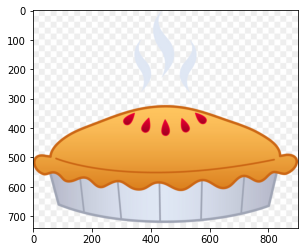

The prediction is:  red_velvet_cake 

    apple_pie  beef_carpaccio  ...  red_velvet_cake  tuna_tartare
0   0.014388        0.011254  ...         0.876336      0.013671

[1 rows x 10 columns]

ALL Predictions:
apple_pie
0    0.014388
Name: apple_pie, dtype: float32


beef_carpaccio
0    0.011254
Name: beef_carpaccio, dtype: float32


cheesecake
0    0.070176
Name: cheesecake, dtype: float32


chicken_quesadilla
0    0.004451
Name: chicken_quesadilla, dtype: float32


clam_chowder
0    0.002842
Name: clam_chowder, dtype: float32


oysters
0    0.002364
Name: oysters, dtype: float32


pad_thai
0    0.001371
Name: pad_thai, dtype: float32


paella
0    0.003147
Name: paella, dtype: float32


red_velvet_cake
0    0.876336
Name: red_velvet_cake, dtype: float32


tuna_tartare
0    0.013671
Name: tuna_tartare, dtype: float32




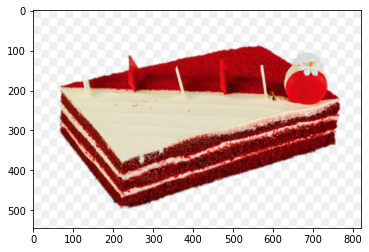

The prediction is:  red_velvet_cake 

       apple_pie  beef_carpaccio  ...  red_velvet_cake  tuna_tartare
0  7.010608e-14    1.254186e-14  ...              1.0  1.103704e-14

[1 rows x 10 columns]

ALL Predictions:
apple_pie
0    7.010608e-14
Name: apple_pie, dtype: float32


beef_carpaccio
0    1.254186e-14
Name: beef_carpaccio, dtype: float32


cheesecake
0    3.136487e-10
Name: cheesecake, dtype: float32


chicken_quesadilla
0    5.219252e-17
Name: chicken_quesadilla, dtype: float32


clam_chowder
0    4.933223e-16
Name: clam_chowder, dtype: float32


oysters
0    7.244714e-19
Name: oysters, dtype: float32


pad_thai
0    1.457127e-19
Name: pad_thai, dtype: float32


paella
0    2.729895e-18
Name: paella, dtype: float32


red_velvet_cake
0    1.0
Name: red_velvet_cake, dtype: float32


tuna_tartare
0    1.103704e-14
Name: tuna_tartare, dtype: float32




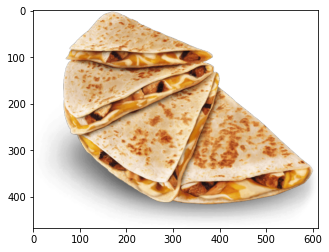

The prediction is:  chicken_quesadilla 

       apple_pie  beef_carpaccio  ...  red_velvet_cake  tuna_tartare
0  9.171307e-11    1.557338e-11  ...     1.405366e-15  8.117835e-10

[1 rows x 10 columns]

ALL Predictions:
apple_pie
0    9.171307e-11
Name: apple_pie, dtype: float32


beef_carpaccio
0    1.557338e-11
Name: beef_carpaccio, dtype: float32


cheesecake
0    8.302250e-13
Name: cheesecake, dtype: float32


chicken_quesadilla
0    1.0
Name: chicken_quesadilla, dtype: float32


clam_chowder
0    1.658061e-13
Name: clam_chowder, dtype: float32


oysters
0    2.033004e-12
Name: oysters, dtype: float32


pad_thai
0    1.642970e-11
Name: pad_thai, dtype: float32


paella
0    9.418927e-12
Name: paella, dtype: float32


red_velvet_cake
0    1.405366e-15
Name: red_velvet_cake, dtype: float32


tuna_tartare
0    8.117835e-10
Name: tuna_tartare, dtype: float32




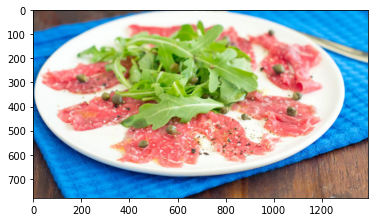

The prediction is:  beef_carpaccio 

       apple_pie  beef_carpaccio  ...  red_velvet_cake  tuna_tartare
0  2.983874e-17             1.0  ...     2.846684e-13  5.226782e-10

[1 rows x 10 columns]

ALL Predictions:
apple_pie
0    2.983874e-17
Name: apple_pie, dtype: float32


beef_carpaccio
0    1.0
Name: beef_carpaccio, dtype: float32


cheesecake
0    1.092273e-14
Name: cheesecake, dtype: float32


chicken_quesadilla
0    7.373179e-14
Name: chicken_quesadilla, dtype: float32


clam_chowder
0    1.085232e-16
Name: clam_chowder, dtype: float32


oysters
0    7.402509e-16
Name: oysters, dtype: float32


pad_thai
0    7.751145e-14
Name: pad_thai, dtype: float32


paella
0    5.089302e-14
Name: paella, dtype: float32


red_velvet_cake
0    2.846684e-13
Name: red_velvet_cake, dtype: float32


tuna_tartare
0    5.226782e-10
Name: tuna_tartare, dtype: float32




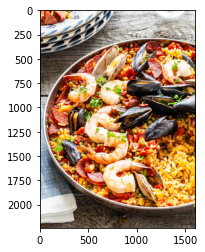

The prediction is:  paella 

       apple_pie  beef_carpaccio  ...  red_velvet_cake  tuna_tartare
0  1.494303e-09    7.353209e-10  ...     3.412140e-13  2.061688e-09

[1 rows x 10 columns]

ALL Predictions:
apple_pie
0    1.494303e-09
Name: apple_pie, dtype: float32


beef_carpaccio
0    7.353209e-10
Name: beef_carpaccio, dtype: float32


cheesecake
0    5.109852e-11
Name: cheesecake, dtype: float32


chicken_quesadilla
0    5.382340e-10
Name: chicken_quesadilla, dtype: float32


clam_chowder
0    1.108932e-12
Name: clam_chowder, dtype: float32


oysters
0    1.982219e-09
Name: oysters, dtype: float32


pad_thai
0    3.613163e-08
Name: pad_thai, dtype: float32


paella
0    1.0
Name: paella, dtype: float32


red_velvet_cake
0    3.412140e-13
Name: red_velvet_cake, dtype: float32


tuna_tartare
0    2.061688e-09
Name: tuna_tartare, dtype: float32




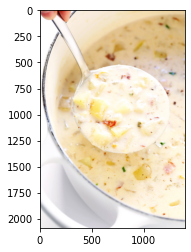

The prediction is:  clam_chowder 

       apple_pie  beef_carpaccio  ...  red_velvet_cake  tuna_tartare
0  7.566126e-08    8.984101e-09  ...     4.825970e-09  1.536765e-08

[1 rows x 10 columns]

ALL Predictions:
apple_pie
0    7.566126e-08
Name: apple_pie, dtype: float32


beef_carpaccio
0    8.984101e-09
Name: beef_carpaccio, dtype: float32


cheesecake
0    8.073879e-08
Name: cheesecake, dtype: float32


chicken_quesadilla
0    5.231095e-08
Name: chicken_quesadilla, dtype: float32


clam_chowder
0    1.0
Name: clam_chowder, dtype: float32


oysters
0    2.546536e-08
Name: oysters, dtype: float32


pad_thai
0    2.647299e-10
Name: pad_thai, dtype: float32


paella
0    2.885172e-09
Name: paella, dtype: float32


red_velvet_cake
0    4.825970e-09
Name: red_velvet_cake, dtype: float32


tuna_tartare
0    1.536765e-08
Name: tuna_tartare, dtype: float32




In [0]:
#Loops through images in prediction directory 


# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from os import listdir
from os.path import isfile, join

prediction_path='/content/drive/My Drive/Colab Notebooks/prediction'
onlyfiles = [f for f in listdir(prediction_path) if isfile(join(prediction_path, f))]
img_size=150

for i in onlyfiles:
    img = prediction_path+'/'+i # the picture you downloaded from internet, which contains a type of food in your food list
    plt.imshow(plt.imread(img))
    plt.show()

    img_array = image_process(img)
    prob_df, result = prediction(model_best, img_array, food_list)
    print('The prediction is: ', result, '\n\n', prob_df)


    print('\nALL Predictions:')
    for i in prob_df:
        print(i)
        print(prob_df[i])
        print('\n')

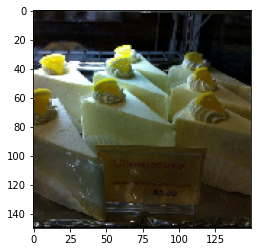

correct answer is:  cheesecake

CNN thinks its: cheesecake


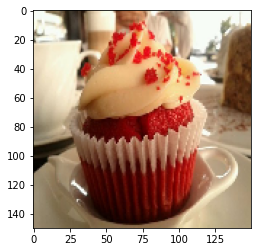

correct answer is:  red_velvet_cake

CNN thinks its: red_velvet_cake


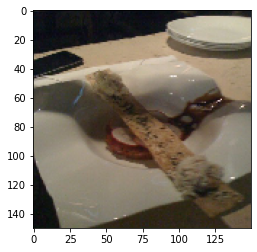

correct answer is:  tuna_tartare

CNN thinks its: apple_pie


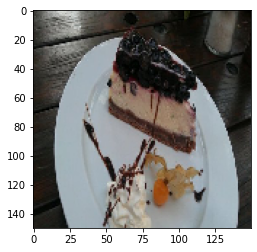

correct answer is:  cheesecake

CNN thinks its: cheesecake


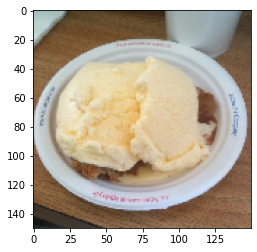

correct answer is:  apple_pie

CNN thinks its: apple_pie


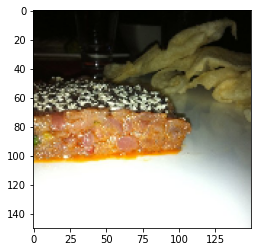

correct answer is:  tuna_tartare

CNN thinks its: apple_pie


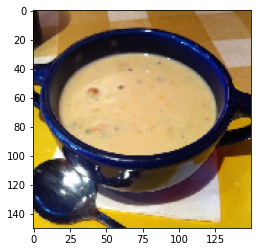

correct answer is:  clam_chowder

CNN thinks its: clam_chowder


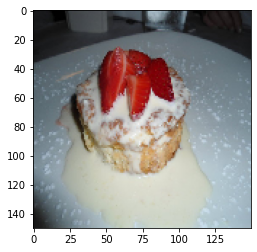

correct answer is:  cheesecake

CNN thinks its: cheesecake


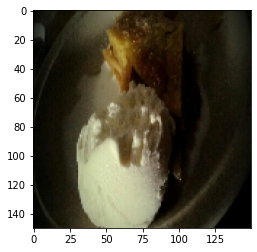

correct answer is:  apple_pie

CNN thinks its: apple_pie


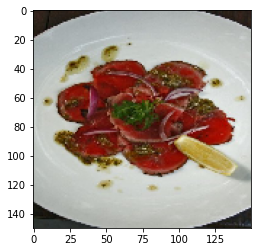

correct answer is:  beef_carpaccio

CNN thinks its: beef_carpaccio


In [0]:
#Display test imgs and prediction


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# routine for human evaluation - use the generator so we can see how well it can predict
for n in range(10):
    _ = test_generator.next()
    image, classifier = (_[0][0],_[1][0]) # take the first image from the batch
    index = np.argmax(classifier)
    answer = list(test_generator.class_indices.keys())[index]
    predicted = model_best.predict(np.asarray([image]))
    predicted_answer_index = np.argmax(predicted[0])
    predicted_answer = list(test_generator.class_indices.keys())[predicted_answer_index]

    plt.imshow(image)
    plt.show()

    print('correct answer is: ', answer)
    print()
    print('CNN thinks it''s:', predicted_answer)